In [74]:
from sklearn.datasets import make_blobs

### 21BDA59
### Assignment4

### Importing

In [75]:
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes

#### Generate noisy moon shaped data 

In [76]:

n_samples = 100
noise     = .3
X_train, y_train = make_moons(n_samples=n_samples, noise=noise, random_state=0)
X_test, y_test = make_moons(n_samples=n_samples, noise=noise, random_state=1)

# Scale data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

#### Plot data

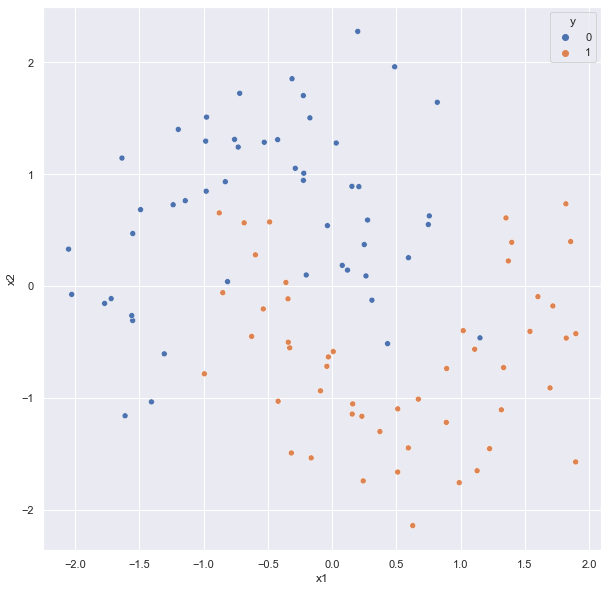

In [77]:

df = pd.concat([pd.DataFrame(data=X_train, columns=['x1', 'x2']), pd.Series(y_train, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

#### Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data.Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

In [78]:
def plot_clf(model, df, grid_range, show_contours=False, show_support_vectors=False):
    # Decision boundary plot
    
    # Get grid of values in given range
    x1 = grid_range
    x2 = grid_range
    xx1, xx2 = np.meshgrid(x1, x2, sparse=False)
    Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
    
    # Get decision boundary values for plot grid
    decision_boundary      = model.predict(Xgrid)
    decision_boundary_grid = decision_boundary.reshape(len(x2), len(x1))
    
    # Get decision function values for plot grid
    decision_function      = model.decision_function(Xgrid)
    decision_function_grid = decision_function.reshape(len(x2), len(x1))
    
    fig = plt.figure(figsize=(10, 10))
    if show_contours:
        plt.contourf(x1, x2, decision_function_grid);
    plt.contour(x1, x2, decision_boundary_grid);
    
    sns.scatterplot(x='x1', y='x2', hue='y', data=df)
    if show_support_vectors:
        sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
    plt.show();

##### Linear kernel

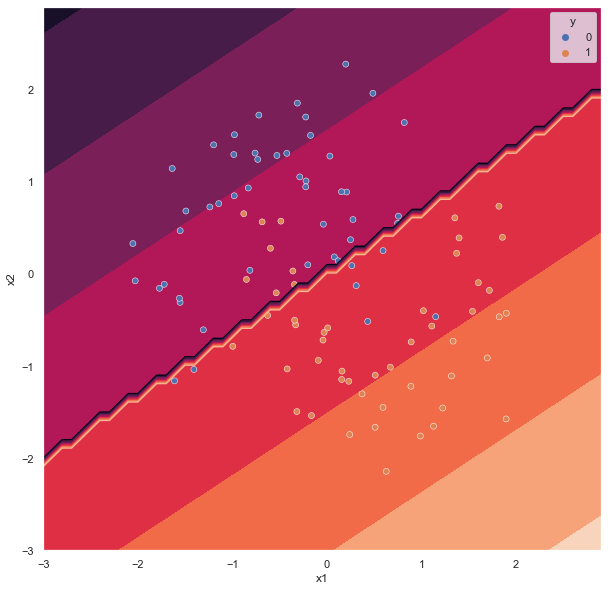

Training accuracy: 0.85
Test accuracy    : 0.83


In [79]:
model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-3, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

#### Polynomial kernel

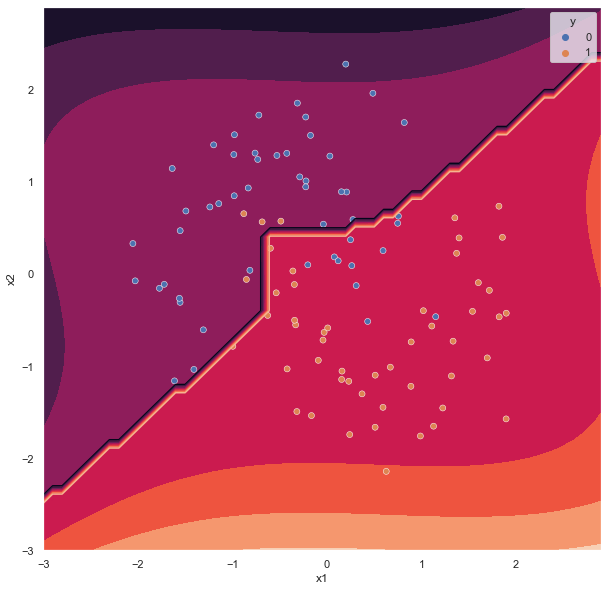

Training accuracy: 0.85
Test accuracy    : 0.87


In [80]:
model = svm.SVC(kernel='poly', degree=3, gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-3, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

#### Radial kernel

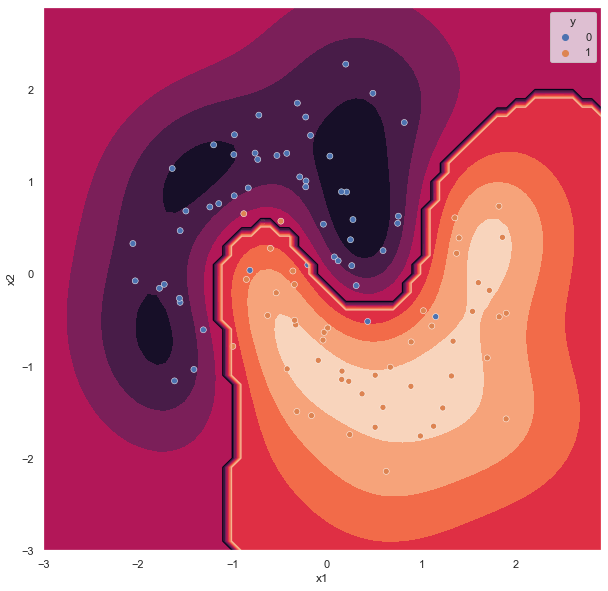

Training accuracy: 0.93
Test accuracy    : 0.91


In [81]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-3, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

#### SVM with a radial kernel outperforms both linear and polynomial kernel models. The linear kernel model is the least effective because the data is not linearly separable.

### Question 2


(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

In [82]:
np.random.seed(0)
x1 = np.random.uniform(0, 1, 500) - 0.5
x2 = np.random.uniform(0, 1, 500) - 0.5
y = 1*(x1**2 - x2**2 > 0)

(b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y- axis.

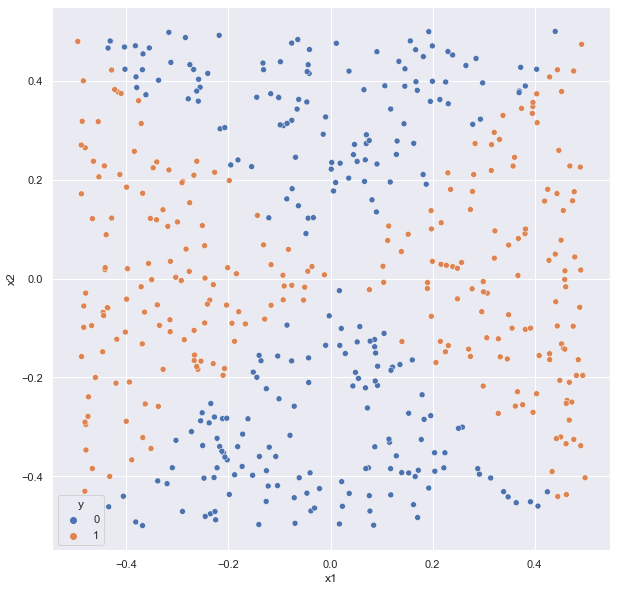

In [83]:
# Plot data
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

(c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

In [84]:
# Pre-process data with only linear features
f = 'y ~ x1 + x2'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

train = np.random.random(len(y)) > 0.5

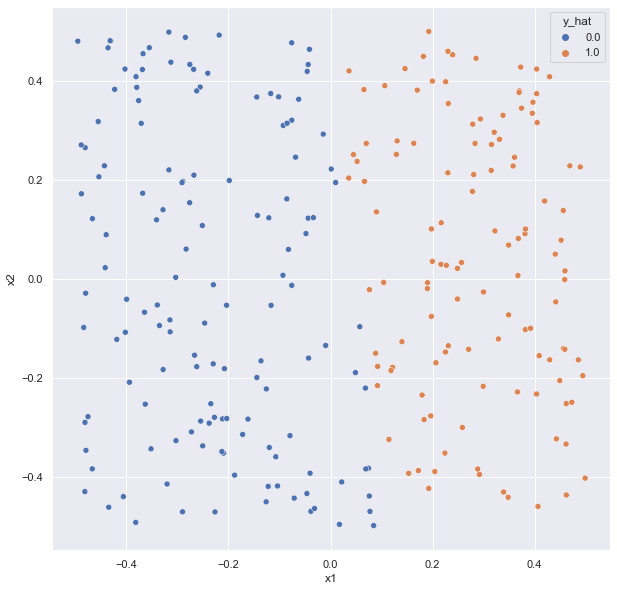

Training accuracy: 0.5984555984555985
Test accuracy    : 0.5228215767634855


In [85]:
# Fit model on training set
model = LogisticRegression().fit(X[train], y[train])
# Predict
y_hat = model.predict(X[train])

# Plot data
plot_df = pd.DataFrame({'x1':X[train][:,1], 'x2':X[train][:,2], 'y_hat':y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show();

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

(e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X12, X1 ×X2, log(X2), and so forth).

(f) Apply this model to the training data in order to obtain a pre- dicted class label for each training observation. Plot the ob- servations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

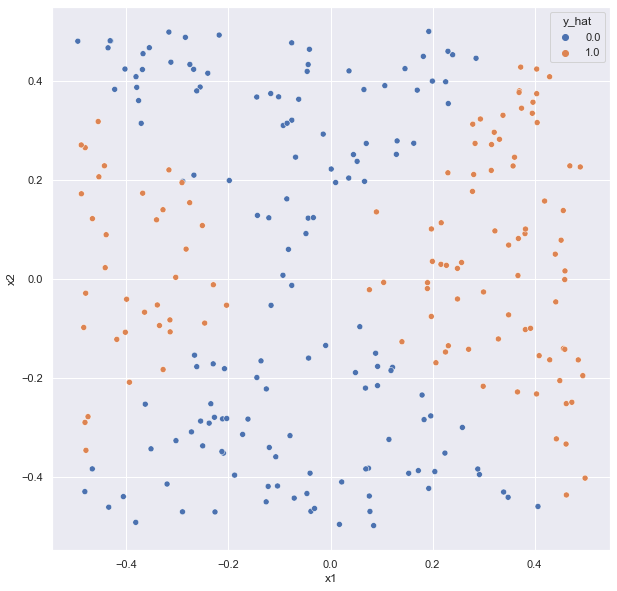

Training accuracy: 0.8957528957528957
Test accuracy    : 0.8506224066390041


In [86]:
# Pre-process data with quadratic features
f = 'y ~ x1 + x2 + np.power(x1, 2) + np.power(x2, 2)'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

# Fit model on training set
model = LogisticRegression().fit(X[train], y[train])
# Predict
y_hat = model.predict(X[train])

# Plot data
plot_df = pd.DataFrame({'x1':X[train][:,1], 'x2':X[train][:,2], 'y_hat':y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show();

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')


(g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

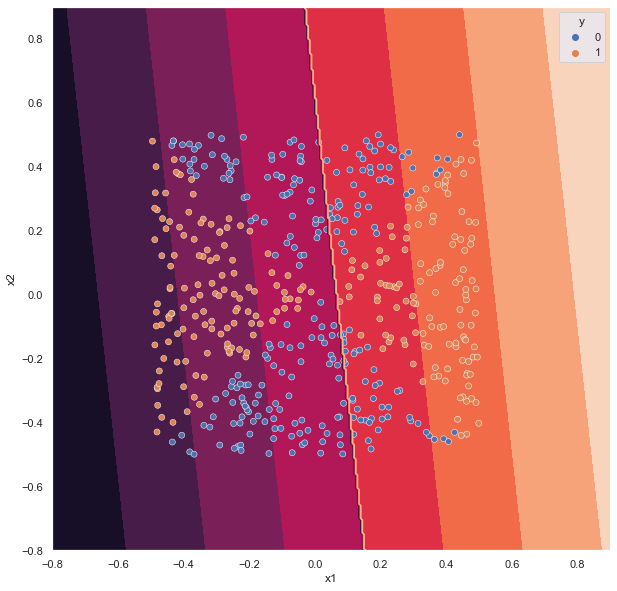

Training accuracy: 0.6023166023166023
Test accuracy    : 0.5186721991701245


In [87]:
f = 'y ~ x1 + x2 - 1'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X[train], y[train])

plot_clf(model, df, np.arange(-.8, .9, .005), show_contours=True)

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

ValueError: Masked arrays must be 1-D

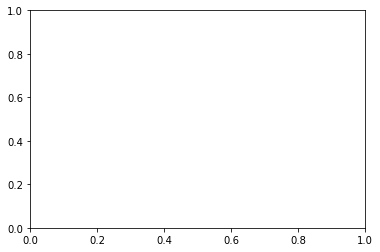

In [36]:
# Plot the samples
markers = ('x', 'o')
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[y == cl, 0], X[y == cl, 1],
                marker=markers[idx], label=cl)

plt.xlim(0.0, 2.0)
plt.xlabel('X1')
plt.ylim(0.0, 2.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()
plt.close()

In [37]:
from sklearn import svm

# Instantiate the three classifiers
linear = svm.SVC(kernel='linear')
radial = svm.SVC(kernel='rbf')
poly_2 = svm.SVC(kernel='poly', degree=2)
poly_3 = svm.SVC(kernel='poly', degree=3)
classifiers = [linear, radial, poly_2, poly_3]
names = ['linear', 'radial', 'degree 2 polynomial', 'degree 3 polynomial']

# Fit classifiers to the training data and calculate accuracy
for name, classifier in zip(names, classifiers):
    classifier.fit(X, y)
    score = classifier.score(X, y)
    print('''The {name} classifier has a mean accuracy of {score} \
on the training data.'''.format(name=name, score=str(int(score*100)) + '%'))

print()
print('''Hence, the polynomial and radial kernels out-perform the linear classifier.''')

The linear classifier has a mean accuracy of 93% on the training data.
The radial classifier has a mean accuracy of 97% on the training data.
The degree 2 polynomial classifier has a mean accuracy of 99% on the training data.
The degree 3 polynomial classifier has a mean accuracy of 100% on the training data.

Hence, the polynomial and radial kernels out-perform the linear classifier.


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\skl

In [38]:
# Generate observations on the interval [0, 1) 
x1_test = np.random.uniform(low=0.0, high=2.0, size=1000)
x2_test = np.random.uniform(low=0.0, high=2.0, size=1000)
X_test = np.matrix([x1_test, x2_test]).T

# Assign class labels based on the decision surface 2x1^3 + 3x2 = 5
y_test = np.where(((2 * (x1_test ** 3)) + (3 * x2_test) >= 5), 1, -1)

In [43]:
x1_test= np.array(x1_test)
x2_test= np.array(x2_test)

In [44]:
for name, classifier in zip(names, classifiers):
    # Predict training and test data
    pred_train = classifier.predict(X)
    pred_test = classifier.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\skl

In [45]:
    # Calculate error rates for training and test data
    err_train = np.sum(np.where(pred_train != y, 1, 0)) / len(pred_train)
    err_test = np.sum(np.where(pred_test != y_test, 1, 0)) / len(pred_test)

In [46]:
plt.plot(dec_x, dec_y, label='actual boundary')
    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(X_test[pred_test == cl, 0], X_test[pred_test == cl, 1],
                    marker=markers[idx], label=cl)

    plt.xlim(0.0, 2.0)
    plt.xlabel('X1')
    plt.ylim(0.0, 2.0)
    plt.ylabel('X2')
    plt.legend(loc='upper left')
    plt.title('SVM with a {name} classifier'.format(name=name))
    plt.show()
    plt.close()
    
    # Print results
    print('''Training error for the {name} classifier: {err}'''.format(
            name=name, err=str(err_train*100) + '%'))
    print('''Testing error for the {name} classifier: {err}'''.format(
            name=name, err=str(err_test*100) + '%'))

IndentationError: unexpected indent (<ipython-input-46-f8a493974777>, line 2)

In [47]:
# Generate random training data
x1 = np.random.uniform(low=0.0, high=10.0, size=500)
x2 = np.random.uniform(low=0.0, high=10.0, size=500)
X = np.matrix([x1, x2]).T
y = np.where(0.15 * (x1 ** 2) - x2 > 0, 1, 0)

ValueError: Masked arrays must be 1-D

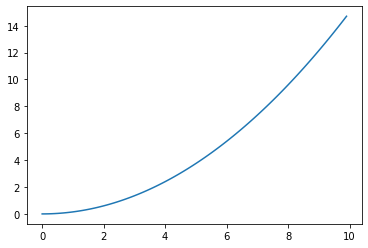

In [48]:
import math

# Plot the decision boundary
dec_x = np.arange(0, 10, 0.1)
dec_y = 0.15 * (dec_x ** 2)
plt.plot(dec_x, dec_y)

# Plot the samples
markers = ('x', 'o')
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[y == cl, 0], X[y == cl, 1],
                marker=markers[idx], label=cl)
    
plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()
plt.close()